## Importing Required libraries

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

## Importing dataset

In [63]:
df = pd.read_csv('Customer-Churn-Records.csv')

## EDA

In [3]:
df.head(n=5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [5]:
df.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')

In [8]:
df = df.drop(['Surname'], axis=1)

In [9]:
numerical_df = df.select_dtypes(include=['int64', 'float64']).columns

In [10]:
categorical_df = df.select_dtypes(include=['object']).columns

In [11]:
numerical_df

Index(['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Complain', 'Satisfaction Score', 'Point Earned'],
      dtype='object')

In [12]:
categorical_df

Index(['Geography', 'Gender', 'Card Type'], dtype='object')

## Applying Encoding like: (OneHotEncoding/Lableencoding)

In [13]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [14]:
categorical_df

Index(['Geography', 'Gender', 'Card Type'], dtype='object')

# Label Encoding for Gender

In [15]:
label = LabelEncoder()

In [16]:
df['Gender'] = label.fit_transform(df['Gender'])

In [17]:
print(df['Gender'])

0       0
1       0
2       0
3       0
4       0
       ..
9995    1
9996    1
9997    0
9998    1
9999    0
Name: Gender, Length: 10000, dtype: int64


# Applying OneHotEncoding for cardType and Geography

In [18]:
ohe = OneHotEncoder(sparse_output=False)

In [19]:
geo_encoded =ohe.fit_transform(df[['Geography', 'Card Type']])

In [20]:
ohe.get_feature_names_out()

array(['Geography_France', 'Geography_Germany', 'Geography_Spain',
       'Card Type_DIAMOND', 'Card Type_GOLD', 'Card Type_PLATINUM',
       'Card Type_SILVER'], dtype=object)

In [21]:
new_df = pd.DataFrame(geo_encoded, columns=ohe.get_feature_names_out())

In [22]:
new_df.shape

(10000, 7)

In [23]:
geo_encoded.shape

(10000, 7)

In [24]:
df = pd.concat([df, new_df], axis=1)

In [25]:
df

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,...,Satisfaction Score,Card Type,Point Earned,Geography_France,Geography_Germany,Geography_Spain,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,1,15634602,619,France,0,42,2,0.00,1,1,...,2,DIAMOND,464,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2,15647311,608,Spain,0,41,1,83807.86,1,0,...,3,DIAMOND,456,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,3,15619304,502,France,0,42,8,159660.80,3,1,...,3,DIAMOND,377,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,4,15701354,699,France,0,39,1,0.00,2,0,...,5,GOLD,350,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,5,15737888,850,Spain,0,43,2,125510.82,1,1,...,5,GOLD,425,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,771,France,1,39,5,0.00,2,1,...,1,DIAMOND,300,1.0,0.0,0.0,1.0,0.0,0.0,0.0
9996,9997,15569892,516,France,1,35,10,57369.61,1,1,...,5,PLATINUM,771,1.0,0.0,0.0,0.0,0.0,1.0,0.0
9997,9998,15584532,709,France,0,36,7,0.00,1,0,...,3,SILVER,564,1.0,0.0,0.0,0.0,0.0,0.0,1.0
9998,9999,15682355,772,Germany,1,42,3,75075.31,2,1,...,2,GOLD,339,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [26]:
df = df.drop(['Card Type', 'Geography', 'RowNumber', 'CustomerId'], axis=1)

In [27]:
df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned,Geography_France,Geography_Germany,Geography_Spain,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,2,464,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,1,3,456,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,3,377,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0,5,350,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,5,425,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,0,1,300,1.0,0.0,0.0,1.0,0.0,0.0,0.0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,0,5,771,1.0,0.0,0.0,0.0,0.0,1.0,0.0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,1,3,564,1.0,0.0,0.0,0.0,0.0,0.0,1.0
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,1,2,339,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [28]:
df.dtypes

CreditScore             int64
Gender                  int64
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Point Earned            int64
Geography_France      float64
Geography_Germany     float64
Geography_Spain       float64
Card Type_DIAMOND     float64
Card Type_GOLD        float64
Card Type_PLATINUM    float64
Card Type_SILVER      float64
dtype: object

In [29]:
X = df.drop(['Exited'], axis=1)

In [30]:
y= df['Exited']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42)

In [32]:
scaler = StandardScaler()

In [33]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_sclaed = scaler.transform(X_test)

In [49]:
logistic_reg = LogisticRegression(max_iter=10000, class_weight='balanced')

In [50]:
logistic_reg.fit(X_train, y_train)

C:\Users\Hassan  COMPUTERS\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 10000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=10000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,10000
,multi_class,'deprecated'


In [51]:
y_pred = logistic_reg.predict(X_test)
y_train_pred = logistic_reg.predict(X_train)

In [52]:
print(accuracy_score(y_train, y_train_pred))

0.9985


In [53]:
print(accuracy_score(y_test, y_pred))

0.999


In [55]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1607
           1       1.00      1.00      1.00       393

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [57]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6355
           1       0.99      1.00      1.00      1645

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000



In [56]:
conf = confusion_matrix(y_test, y_pred)

<Axes: >

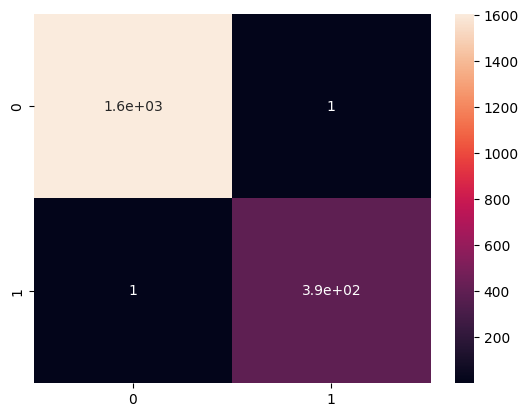

In [58]:
sns.heatmap(conf, annot= True)

In [59]:
conf = confusion_matrix(y_train, y_train_pred)

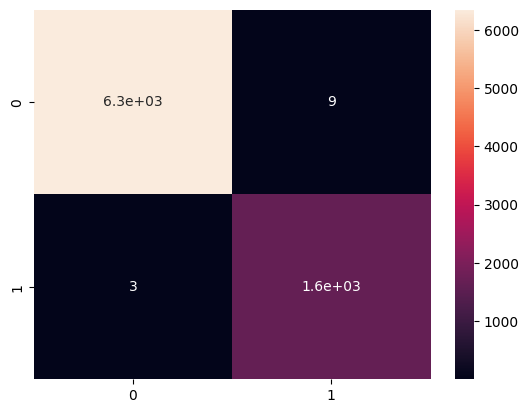

In [55]:
sns.heatmap(conf, annot=True)
plt.show()

In [43]:
print(precision_score(y_test, y_pred))

0.9974554707379135


In [44]:
print(precision_score(y_train, y_train_pred))

0.9945487583282859


In [45]:
import joblib

In [60]:
joblib.dump(scaler, 'churn_scaler.pkl')
joblib.dump(logistic_reg, 'churn_logisticregression.pkl')
joblib.dump(label, 'churn_labelencoder.pkl')
joblib.dump(ohe, 'churn_ohe.pkl')

['churn_ohe.pkl']